In [1]:
from glob import glob


def make_translation(source, target):
    assert len(source) == len(target)
    return {
        ord(a): ord(b)
        for a, b in zip(source, target)
    }


DASHES_TRANSLATION = make_translation(
    '‑–—−',
    '----'
)


def preprocess(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\xad', '')
    text = text.translate(DASHES_TRANSLATION)
    return text
    
texts = []
for path in sorted(glob('texts/*.txt')):
    with open(path) as file:
        text = file.read()
        text = preprocess(text)
        texts.append(text)

In [2]:
from random import seed, sample

seed(2)
for text in sample(texts, 3):
    print(text)
    print('---' * 10)

двое взрослых плюс ребенок 7 лет , Анталия, все включено
------------------------------
Хочу в Абхазию, чтобы отель были видны горы и море, на первой линии. Говорят что есть отели все включено
------------------------------
ДОбрый вечер! Хотим в Испанию с мужем и дочкой 3 года. Совместить пляжный отдых и экскурсии. Слышала про салоу, но там наверное дорогие отели? Можно же ареновать машину или как то по другому потом доехать до барселоны. Еще хотели бы посетить порт авентуру. Подскажите по ценам?
------------------------------


In [3]:
lines = []
for text in texts:
	for line in text.splitlines():
		lines.append(line)
		
sample(lines, 3)

['Ну раз Турцию наконец то открыли, решили выбраться с семьей. Едем с мужем и двумя детьми (17 и 10). Муж и дети не любят активный отдых, им нужен шведский стол, море, бассейн, мужу мииниьар. Я бы хотела на экскурсии. Отель все включено не ниже хорошей четверки',
 'Здравствуйте, мы с женой хотели бы полететь в Турцию, Анталия. По отелю следующее: первая линия, чистый пляж, не на 1 этаже номер:))), шведский стол и чтобы не шумно. Бюджет около ста. Спасибо',
 'Мы с женой хотим отдохнуть в Белеке, в хорошем отеле на берегу. Номер должен быть обязательно с видом на море. Анимация не нужна, хороший алкоголь приветствуется. Что Вы можете предложить?']

In [19]:
from IPython.display import display

from ipymarkup import show_span_box_markup as show_markup

from yargy import (
    Parser,
    or_, rule
)
from yargy.pipelines import morph_pipeline
from yargy.predicates import (
    eq, in_, dictionary,
    type, gram
)
from yargy.tokenizer import MorphTokenizer
from yargy import interpretation as interp
from yargy.interpretation import fact, attribute


def show_matches(rule, *lines):
    parser = Parser(rule)
    for line in lines:
        matches = parser.findall(line)
        matches = sorted(matches, key=lambda _: _.span)
        spans = [_.span for _ in matches]
        show_markup(line, spans)
        if matches:
            facts = [_.fact for _ in matches]
            if len(facts) == 1:
                facts = facts[0]
            display(facts)

INT = type('INT')
NOUN = gram('NOUN')
ADJF = gram('ADJF')
PRTF = gram('PRTF')
GENT = gram('gent')
DOT = eq('.')


TOKENIZER = MorphTokenizer()

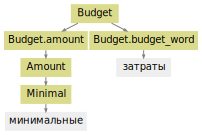

Budget(
    budget_word='затраты',
    amount=Amount(
        value=None
    )
)

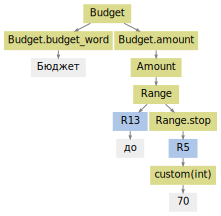

Budget(
    budget_word='Бюджет',
    amount=Amount(
        value=None
    )
)

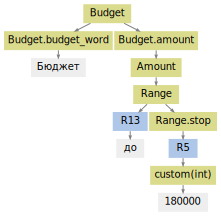

Budget(
    budget_word='Бюджет',
    amount=Amount(
        value=None
    )
)

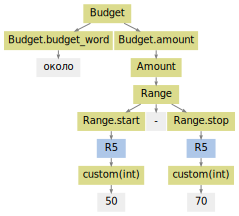

Budget(
    budget_word='около',
    amount=Amount(
        value=None
    )
)

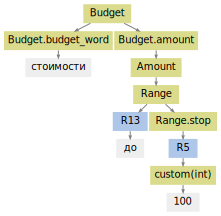

Budget(
    budget_word='стоимости',
    amount=Amount(
        value=None
    )
)

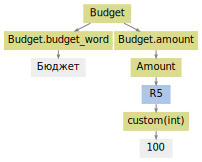

Budget(
    budget_word='Бюджет',
    amount=Amount(
        value=None
    )
)

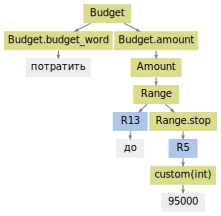

Budget(
    budget_word='потратить',
    amount=Amount(
        value=None
    )
)

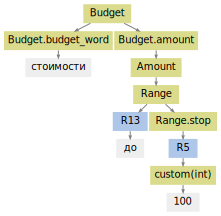

Budget(
    budget_word='стоимости',
    amount=Amount(
        value=None
    )
)

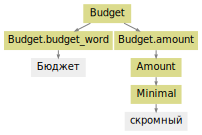

Budget(
    budget_word='Бюджет',
    amount=Amount(
        value=None
    )
)

In [33]:
%run -n -i rules/budget.py

parser = Parser(BUDGET)
seed(1)
for line in sample(lines, 30):
    matches = list(parser.findall(line))
    spans = [_.span for _ in matches]
    show_markup(line, spans)
    if matches:
        match = matches[0]
        display(match.tree.as_dot)
        display(match.fact)


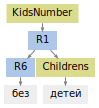

KidsNumber(
    words=None,
    amount=None
)

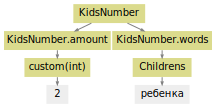

KidsNumber(
    words=Childrens(),
    amount=2
)

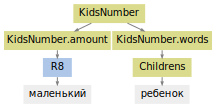

KidsNumber(
    words=Childrens(),
    amount='маленький'
)

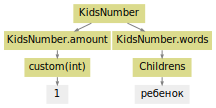

KidsNumber(
    words=Childrens(),
    amount=1
)

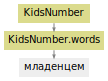

KidsNumber(
    words='младенцем',
    amount=None
)

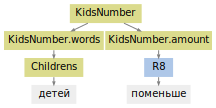

KidsNumber(
    words=Childrens(),
    amount='поменьше'
)

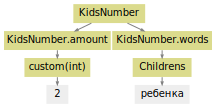

KidsNumber(
    words=Childrens(),
    amount=2
)

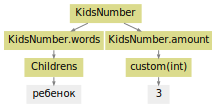

KidsNumber(
    words=Childrens(),
    amount=3
)

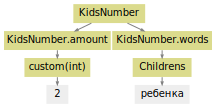

KidsNumber(
    words=Childrens(),
    amount=2
)

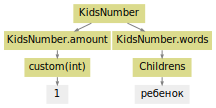

KidsNumber(
    words=Childrens(),
    amount=1
)

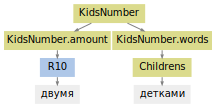

KidsNumber(
    words=Childrens(),
    amount='двумя'
)

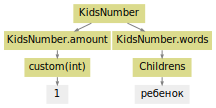

KidsNumber(
    words=Childrens(),
    amount=1
)

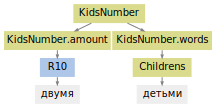

KidsNumber(
    words=Childrens(),
    amount='двумя'
)

In [50]:
%run -n -i rules/children.py

parser = Parser(KIDS_NUMBER)
seed(1)
for line in sample(lines, 30):
    matches = list(parser.findall(line))
    spans = [_.span for _ in matches]
    show_markup(line, spans)
    if matches:
        match = matches[0]
        display(match.tree.as_dot)
        display(match.fact)

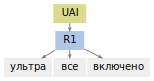

UAI()

In [46]:
%run -n -i rules/misc.py

parser = Parser(UAI)
seed(1)
for line in sample(lines, 30):
    matches = list(parser.findall(line))
    spans = [_.span for _ in matches]
    show_markup(line, spans)
    if matches:
        match = matches[0]
        display(match.tree.as_dot)
        display(match.fact)